In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weatherkey
import time
from datetime import datetime

In [9]:
# Starting URL fo Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherkey

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Create a set of random latitutde and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [14]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | matara
Processing Record 2 of Set 1 | bom jardim
Processing Record 3 of Set 1 | dumai
Processing Record 4 of Set 1 | kinsale
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nadym
Processing Record 7 of Set 1 | christchurch
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | kutum
Processing Record 10 of Set 1 | tabialan
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | loviisa
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | marcona
City not found. Skipping...
Processing Record 24 of S

Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | coihueco
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | vardo
Processing Record 42 of Set 4 | najran
Processing Record 43 of Set 4 | dekalb
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | adre
Processing Record 47 of Set 4 | sungairaya
Processing Record 48 of Set 4 | villa maria
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | dali
Processing Record 1 of Set 5 | belmonte
Processing Record 2 of Set 5 | skagastrond
City not found. Skipping...
Processing Record 3 of Set 5 | great yarmouth
Processing Record 4 of Set 5 | maple creek
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | bogorodskoye
Processing Record 7 of Set 5 | jinchang
Processing Record 8 of Set 5 | thunder bay
Processing Record 9 of Set 5 | quesnel
Processing Record 10 of S

Processing Record 27 of Set 8 | victoria point
Processing Record 28 of Set 8 | kieta
Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | rundu
Processing Record 33 of Set 8 | olinda
Processing Record 34 of Set 8 | powell river
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | saint anthony
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | katghora
Processing Record 41 of Set 8 | sorland
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | sayyan
Processing Record 44 of Set 8 | keti bandar
Processing Record 45 of Set 8 | harsud
Processing Record 46 of Set 8 | itaqui
Processing Record 47 of Set 8 | paradwip
City not found. Skipping...
Processing Record 48 of Set 8 | celestun
Processing Record 49 of Set 8 | mwense
Processing Record 50 of 

Processing Record 16 of Set 12 | chatellerault
Processing Record 17 of Set 12 | gillette
Processing Record 18 of Set 12 | inuvik
Processing Record 19 of Set 12 | portland
Processing Record 20 of Set 12 | sikandarpur
Processing Record 21 of Set 12 | port macquarie
Processing Record 22 of Set 12 | wodonga
Processing Record 23 of Set 12 | steinkjer
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | shubarshi
Processing Record 26 of Set 12 | juneau
Processing Record 27 of Set 12 | witu
Processing Record 28 of Set 12 | moree
Processing Record 29 of Set 12 | marica
Processing Record 30 of Set 12 | bouca
Processing Record 31 of Set 12 | la asuncion
Processing Record 32 of Set 12 | taburi
City not found. Skipping...
Processing Record 33 of Set 12 | saleaula
City not found. Skipping...
Processing Record 34 of Set 12 | yenagoa
Processing Record 35 of Set 12 | abu samrah
Processing Record 36 of Set 12 | marzuq
Processing Record 37 of Set 12 | sri aman
Processing Record 38 of 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
output_city_data_df = pd.DataFrame(city_data)
output_city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Matara,5.9485,80.5353,71.02,88,86,3.65,LK,2022-01-26 23:36:59
1,Bom Jardim,-7.7958,-35.5872,79.14,80,46,8.21,BR,2022-01-26 23:37:00
2,Dumai,1.6833,101.4500,72.32,91,44,2.44,ID,2022-01-26 23:36:46
3,Kinsale,51.7075,-8.5306,50.23,100,75,14.97,IE,2022-01-26 23:37:00
4,Ushuaia,-54.8000,-68.3000,51.46,71,75,32.21,AR,2022-01-26 23:34:20
5,Nadym,65.5333,72.5167,1.02,96,95,10.38,RU,2022-01-26 23:37:00
6,Christchurch,-43.5333,172.6333,65.91,53,40,11.01,NZ,2022-01-26 23:34:07
7,Cherskiy,68.7500,161.3000,-43.20,99,46,4.21,RU,2022-01-26 23:37:01
8,Kutum,14.2000,24.6667,52.99,27,75,15.46,SD,2022-01-26 23:37:01
9,Vaini,-21.2000,-175.2000,87.96,74,20,6.91,TO,2022-01-26 23:33:33


In [18]:
# Rearrange columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = output_city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Matara,LK,2022-01-26 23:36:59,5.9485,80.5353,71.02,88,86,3.65
1,Bom Jardim,BR,2022-01-26 23:37:00,-7.7958,-35.5872,79.14,80,46,8.21
2,Dumai,ID,2022-01-26 23:36:46,1.6833,101.4500,72.32,91,44,2.44
3,Kinsale,IE,2022-01-26 23:37:00,51.7075,-8.5306,50.23,100,75,14.97
4,Ushuaia,AR,2022-01-26 23:34:20,-54.8000,-68.3000,51.46,71,75,32.21
...,...,...,...,...,...,...,...,...,...
557,Imbituba,BR,2022-01-26 23:52:16,-28.2400,-48.6703,82.29,89,44,10.54
558,Camacupa,AO,2022-01-26 23:52:17,-12.0167,17.4833,60.96,97,99,3.83
559,Wewak,PG,2022-01-26 23:52:17,-3.5534,143.6268,83.03,75,93,1.01
560,Carlyle,US,2022-01-26 23:52:18,38.6103,-89.3726,23.43,50,0,5.46


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

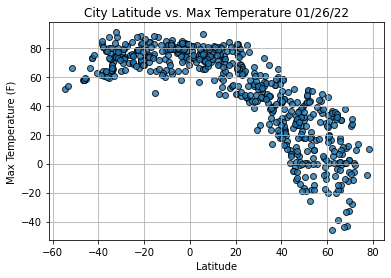

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

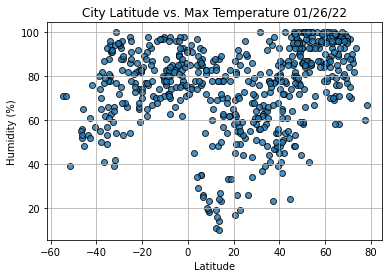

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

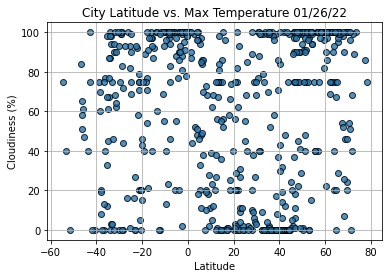

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()